# Creating multivariate model with features from lesson

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

fbi = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
                 ,skiprows=[1,2,3])

# data cleaning
fbi.columns = fbi.iloc[0]
fbi = fbi.drop(fbi.index[0])

# remove entirely NaN column
fbi = fbi.drop(fbi.columns[4], axis=1)
fbi.columns = ['city','population','violent_crime','murder','rape','robbery','agg_assault','property_crime','burglary','larceny','mv_theft','arson']

# stripping columns
fbi_obj = fbi.select_dtypes(['object'])
fbi[fbi_obj.columns] = fbi_obj.apply(lambda x: x.str.replace(',',''))

# delete reference rows at the bottom
fbi = fbi.drop(fbi.index[-3:])

# changing datatypes to numbers for all columns but city
for column in fbi:
    if column != 'city':
        fbi[column] = pd.to_numeric(fbi[column])
        
fbi.head(100)

,city,population,violent_crime,murder,rape,robbery,agg_assault,property_crime,burglary,larceny,mv_theft,arson
1,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.0
2,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.0
3,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.0
4,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
5,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN
6,Alfred Village,4089,5,0,0,3,2,46,10,36,0,NaN
7,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0.0
8,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3.0
9,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1.0
10,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0.0


In [2]:
# Creating necessary df variables
fbi['murder_binary'] = np.where(fbi['murder'] > 0,1,0)
fbi['robbery_binary'] = np.where(fbi['robbery'] > 0,1,0)
fbi['pop_squared'] = fbi['population']**2
fbi.head()

,city,population,violent_crime,murder,rape,robbery,agg_assault,property_crime,burglary,larceny,mv_theft,arson,murder_binary,robbery_binary,pop_squared
1,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.0,0,0,3463321
2,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.0,0,0,6640929
3,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.0,0,0,8099716
4,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN,1,1,9595377936
5,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN,0,1,40806544



Coefficients: 
 [  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]

Intercept: 
 -109.575335623

R-squared:
0.996124710499


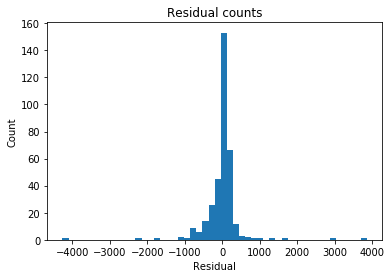

In [3]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X = fbi[['population','pop_squared','murder_binary','robbery_binary']]
Y = fbi['property_crime']

regr.fit(X,Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X)
actual = fbi['property_crime']

# Calculate residuals
residual = actual - predicted
residual = pd.to_numeric(residual)
fbi['residuals'] = residual

# Histogram of residuals
plt.hist(residual,bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim()
plt.show()

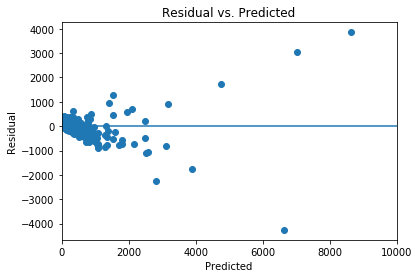

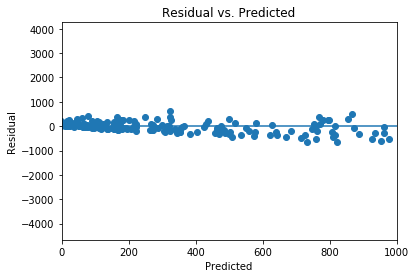

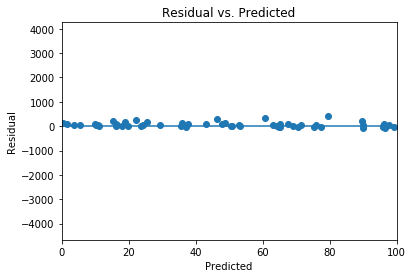

In [4]:
fbi['adjusted_residual'] = residual/predicted

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0,10000)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0,1000)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0,100)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Evaluation
The model we created based on the given features actually performed quite well. It has an extremely high $r^2$ value at > 0.99 and has relatively normally distributed residuals (multivariate normality) that are consistent throughout the dataset (no homoscedasticity). If anything, it is probably overfit due to the extremely high $r^2$ value, but we're not really controlling for that in this exercise.

# Trying a new version
I'll try to create my own version just for fun. First I'll look at which variables seem to have a correlation with the outcome variable

In [5]:
fbi.sort_values('violent_crime',ascending=False)

,city,population,violent_crime,murder,rape,robbery,agg_assault,property_crime,burglary,larceny,mv_theft,arson,murder_binary,robbery_binary,pop_squared,residuals,adjusted_residual
217,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,NaN,1,1,70494931807876,-2.643627,-0.000019
36,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,NaN,1,1,66971746521,3854.191535,0.446252
273,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132.0,1,1,44336355844,3037.810842,0.433157
311,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57.0,1,1,20688219556,1722.481815,0.362588
347,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10.0,1,1,39654349956,-4259.012745,-0.642675
4,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN,1,1,9595377936,906.059013,0.284572
286,Schenectady,66041,607,8,31,203,365,2800,769,1878,153,NaN,1,1,4361413681,711.088705,0.340411
219,Niagara Falls,49574,584,3,12,166,403,2807,746,1949,112,22.0,1,1,2457581476,1284.766823,0.844001
207,Mount Vernon,68071,554,2,7,228,317,1436,317,972,147,NaN,1,1,4633661041,-722.690323,-0.334782
210,Newburgh,28571,435,5,21,150,259,1040,304,673,63,15.0,1,1,816302041,242.203485,0.303591


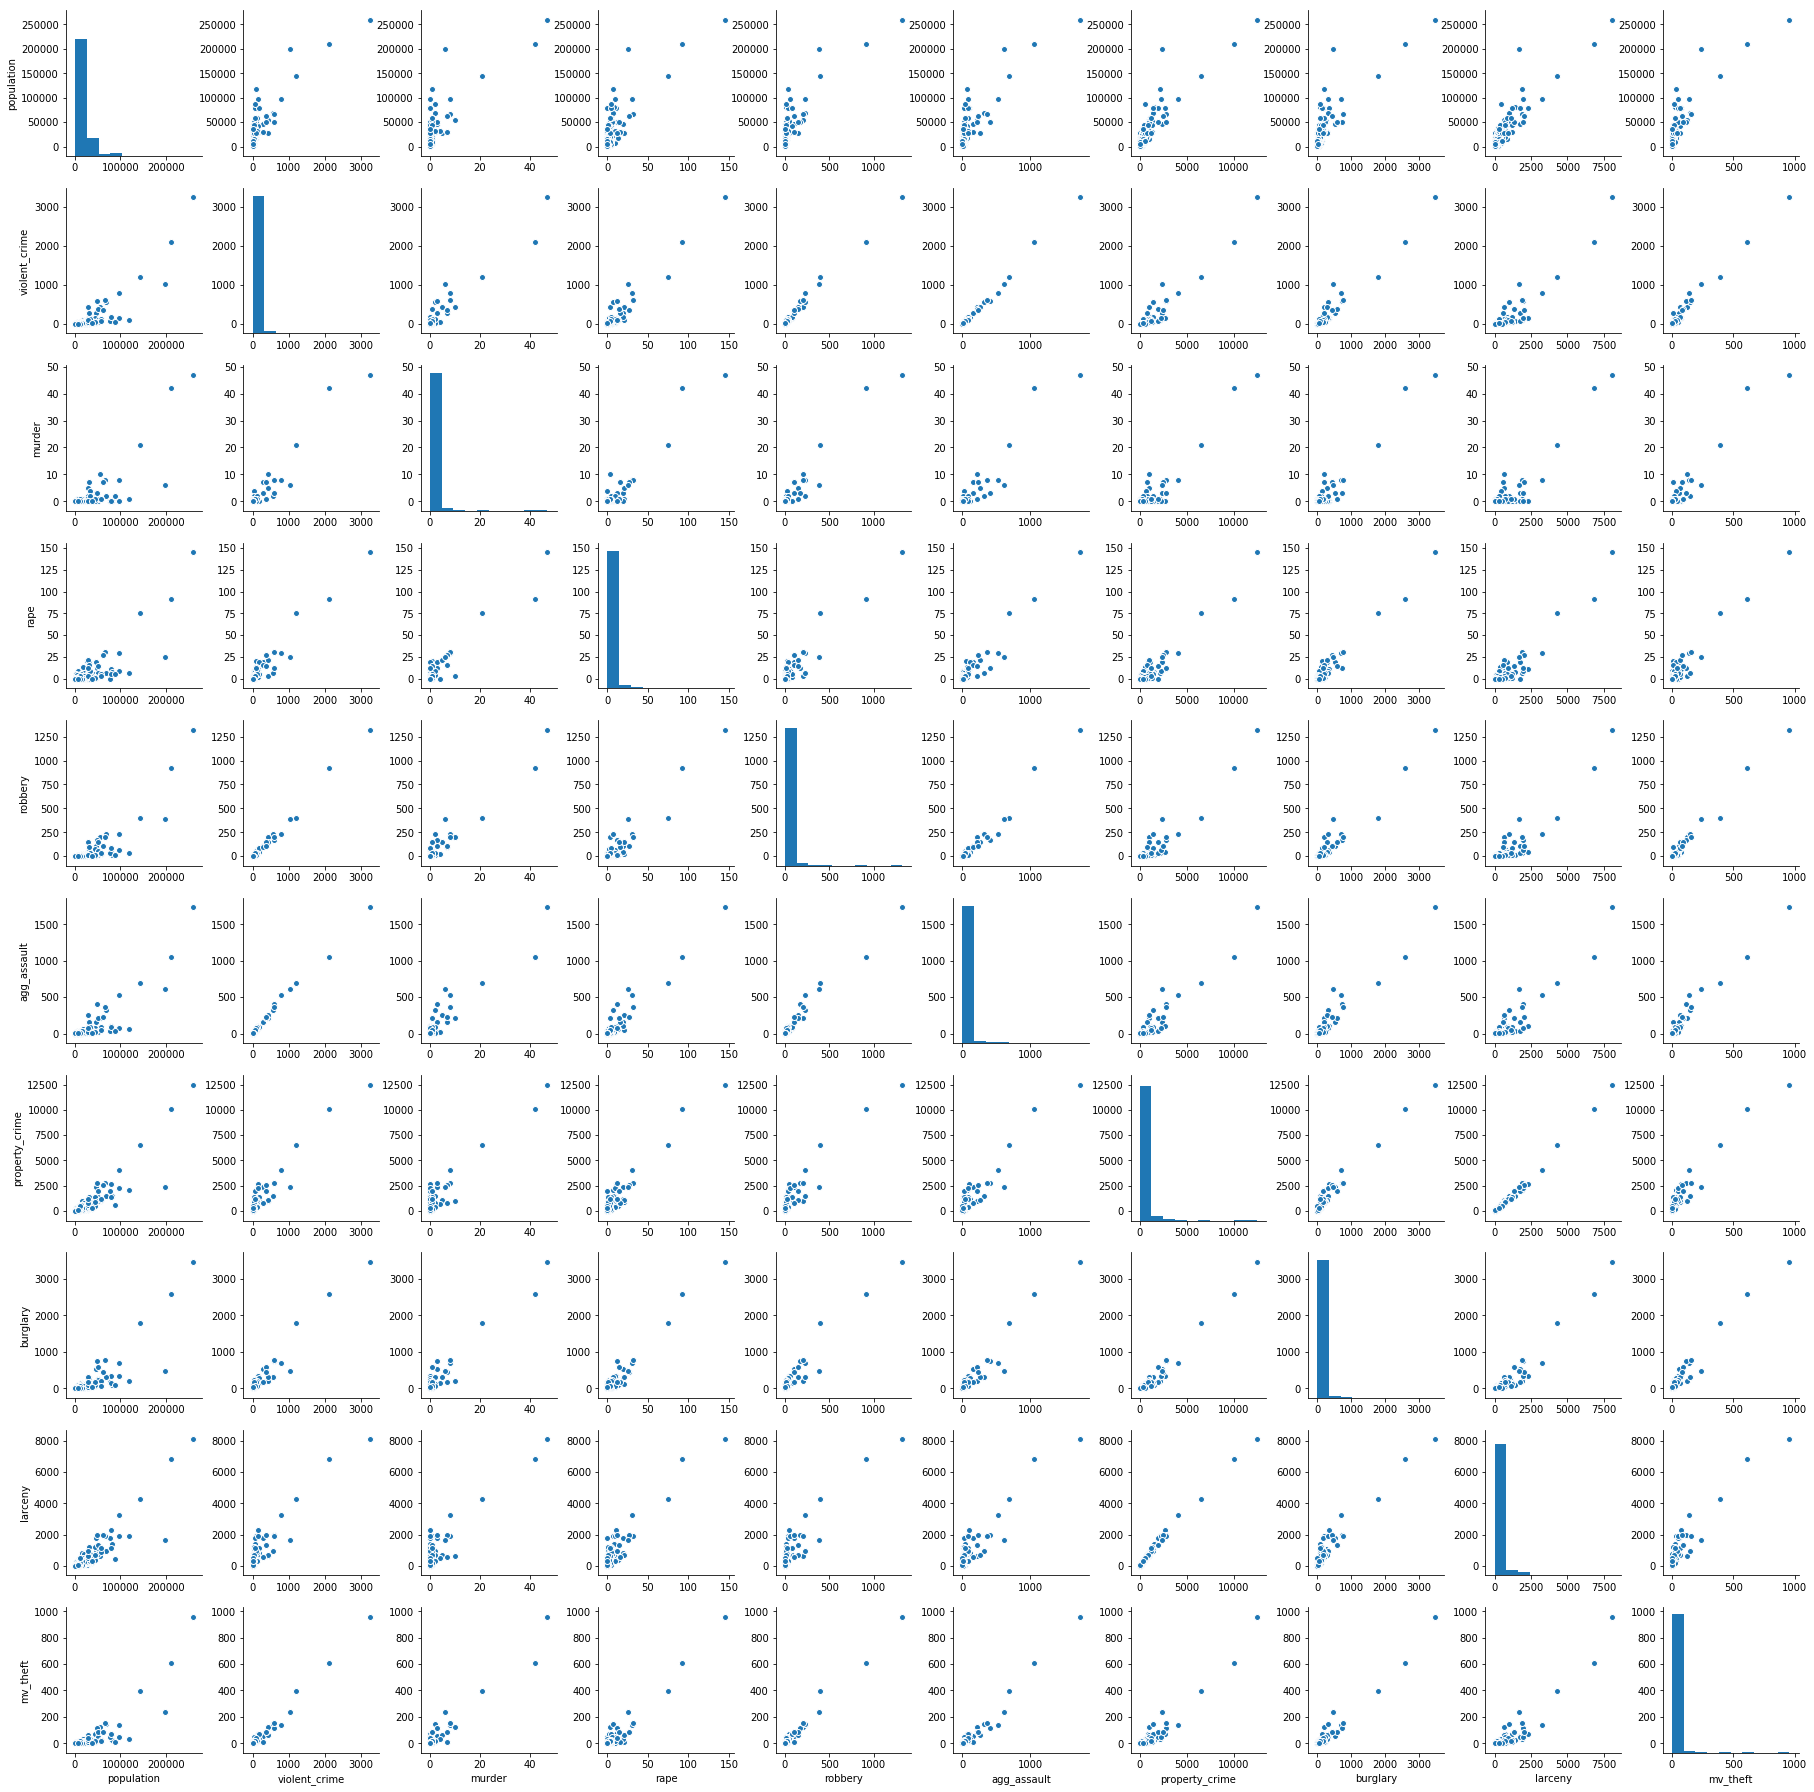

In [6]:
# Pairplot, dropping NYC since it is such an outlier and the arson column, which has many NaN values

fbi = fbi.drop(['murder_binary','robbery_binary','pop_squared','adjusted_residual','residuals'],axis=1)
h = sns.pairplot(fbi[fbi.city != 'New York'].drop(['arson'],axis=1))
plt.show()

Looks like a lot of the variables have a positive linear relationship with property crime, so let's do a correlation matrix to be sure.

In [7]:
fbi.corr()

,population,violent_crime,murder,rape,robbery,agg_assault,property_crime,burglary,larceny,mv_theft,arson
population,1.000000,0.998854,0.986758,0.990839,0.998469,0.999134,0.996265,0.970578,0.997946,0.992421,0.701761
violent_crime,0.998854,1.000000,0.992098,0.994985,0.999923,0.999942,0.998059,0.978150,0.998762,0.996271,0.917793
murder,0.986758,0.992098,1.000000,0.997746,0.993104,0.990843,0.995403,0.993733,0.993175,0.997992,0.963200
rape,0.990839,0.994985,0.997746,1.000000,0.995438,0.994140,0.997843,0.992442,0.996260,0.998764,0.926301
robbery,0.998469,0.999923,0.993104,0.995438,1.000000,0.999742,0.998237,0.979525,0.998735,0.996927,0.931607
agg_assault,0.999134,0.999942,0.990843,0.994140,0.999742,1.000000,0.997622,0.976288,0.998561,0.995403,0.888278
property_crime,0.996265,0.998059,0.995403,0.997843,0.998237,0.997622,1.000000,0.987137,0.999666,0.998302,0.920765
burglary,0.970578,0.978150,0.993733,0.992442,0.979525,0.976288,0.987137,1.000000,0.982700,0.991464,0.952121
larceny,0.997946,0.998762,0.993175,0.996260,0.998735,0.998561,0.999666,0.982700,1.000000,0.996878,0.893610
mv_theft,0.992421,0.996271,0.997992,0.998764,0.996927,0.995403,0.998302,0.991464,0.996878,1.000000,0.935194


These variables are all tremendously correlated, so I think this could be a situation where PCA is appropriate.

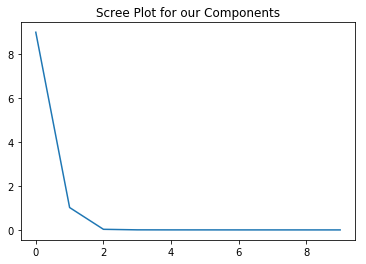

Percent of variance explained by component 
 [0.89523536880144228, 0.10138332369225306, 0.0027530178699322894, 0.00032734879615121666, 0.00012948820588291351, 9.6263653838233592e-05, 4.6026694620829019e-05, 2.3415582002144966e-05, 5.746703877089306e-06, 3.1177824883255423e-32]

 Eigenvalues: [8.9781529781816118, 1.016754946539022, 0.02760951639009904, 0.0032829216443983687, 0.0012986137074136571, 0.00096541070708084417, 0.00046159336392070601, 0.00023483062065551724, 5.7632649833633383e-05, 3.1267674522688435e-31]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=10)
pca_feat = fbi.fillna(0).drop(['property_crime','city'],axis=1)
X = StandardScaler().fit_transform(pca_feat)
Y_sklearn = sklearn_pca.fit_transform(X)
var_ratios = (list(sklearn_pca.explained_variance_ratio_))
component_variances = (list(sklearn_pca.explained_variance_))

# Performing a scree plot to decide which ones to keep

sorted_eigenvals = sorted(component_variances,reverse=True)
plt.plot(sorted_eigenvals)
plt.title("Scree Plot for our Components")
plt.show()

print('Percent of variance explained by component \n',var_ratios)
print('\n Eigenvalues: {}'.format(sorted_eigenvals))

There's not much use in any of the components but the first two, the only ones with eigenvalues of 1 and which collectively explain nearly all the variance in these several variables. I suspect that basically the property crime increases in a roughly linear relationship with population and all other measures of crime. Let's see how the model works if we use just these two.

In [9]:
# Creating the corresponding DF
fbi_pca = pd.DataFrame(Y_sklearn[:,0:2])
fbi_pca['property_crime'] = fbi['property_crime'].values.reshape(-1, 1)
fbi_pca.columns = ['component_1','component_2','property_crime']
fbi_pca.head()

,component_1,component_2,property_crime
0,-0.269159,-0.124666,12
1,-0.265973,-0.124845,24
2,-0.267582,-0.125068,16
3,0.923785,-0.096983,4090
4,-0.211496,-0.121533,223


In [10]:
Y_sklearn

array([[ -2.69159248e-01,  -1.24665722e-01,  -2.38061054e-02, ...,
         -3.60180989e-03,  -2.85994336e-04,   1.04086309e-14],
       [ -2.65972604e-01,  -1.24845274e-01,  -2.43108598e-02, ...,
         -3.97604242e-03,   1.20219564e-03,  -3.59618349e-17],
       [ -2.67581620e-01,  -1.25068482e-01,  -2.63296824e-02, ...,
         -2.90956350e-03,   7.89633189e-04,  -6.65466600e-18],
       ..., 
       [ -2.59738344e-01,  -1.24405173e-01,  -2.07593976e-02, ...,
          2.78129435e-03,  -3.64558022e-04,  -7.12303873e-18],
       [  9.81279119e-01,   1.11033681e+00,  -7.74440492e-02, ...,
          5.65845055e-02,   1.43587436e-02,   3.09286070e-17],
       [ -2.06806870e-01,  -1.27253596e-01,  -3.41832482e-02, ...,
          3.36171241e-02,  -3.89712584e-04,   2.50676758e-17]])


Coefficients: 
 [ 2555.02090544   -77.49487794]

Intercept: 
 792.606321839

R-squared:
0.999067502897


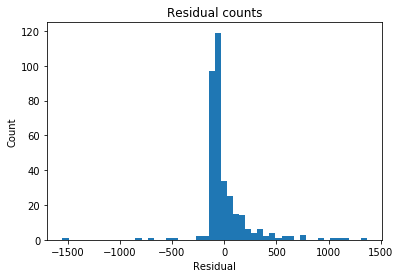

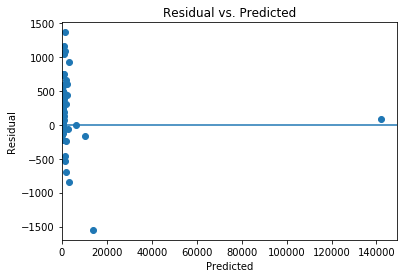

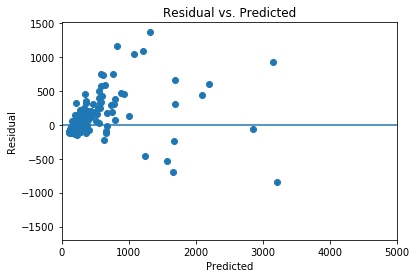

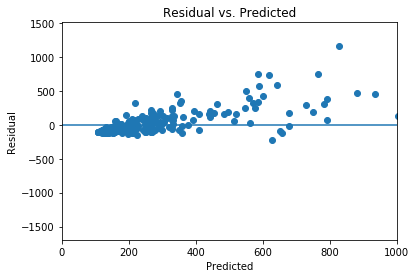

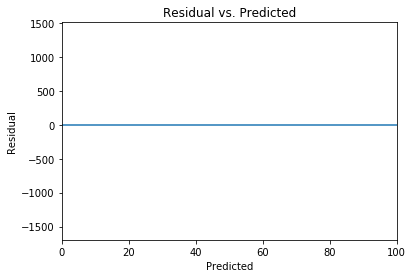

In [11]:
# Creation of the model
regr = linear_model.LinearRegression()

X = fbi_pca[['component_1','component_2']]
Y = fbi_pca['property_crime']

regr.fit(X,Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X)
actual = fbi_pca['property_crime']

# Calculate residuals
residual = actual - predicted
residual = pd.to_numeric(residual)

# Histogram of residuals
plt.hist(residual,bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim()
plt.show()

#Scatter plots
xlims = [(0,None),(0,5000),(0,1000),(0,100)]

for limit_tuple in xlims:
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.xlim(limit_tuple)
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()

Our model does just about as well in terms of $r^2$, but has some issues. Since it's lumping many variables together, it's getting the opposing ends of the spectrum very wrong. It's vastly overestimating many low property crime areas and vastly underestimating many high property crime areas, likely low population and high population areas, respectively. 

Let's add binaries for high and low population areas to see if this improves our results.

In [12]:
percentile_divider = 25
fbi_pca['high_pop'] = np.where(fbi['population'] > np.percentile(fbi['population'],100-percentile_divider),1,0)
fbi_pca['low_pop'] = np.where(fbi['population'] < np.percentile(fbi['population'],percentile_divider),1,0)
fbi_pca['population'] = fbi['population'].values.reshape(-1,1)
fbi_pca

,component_1,component_2,property_crime,high_pop,low_pop,population
0,-0.269159,-0.124666,12,0,1,1861
1,-0.265973,-0.124845,24,0,1,2577
2,-0.267582,-0.125068,16,0,1,2846
3,0.923785,-0.096983,4090,1,0,97956
4,-0.211496,-0.121533,223,0,0,6388
5,-0.261321,-0.124569,46,0,0,4089
6,-0.268991,-0.124994,10,0,1,1781
7,0.118513,0.246277,2118,1,0,118296
8,-0.226429,0.000442,210,0,0,9519
9,-0.184160,-0.120023,405,0,0,18182


Let's try the model again.


Coefficients: 
 [ 2550.25019344   -94.8280763    211.77962424   -56.91768019]

Intercept: 
 753.890835827

R-squared:
0.999238696799


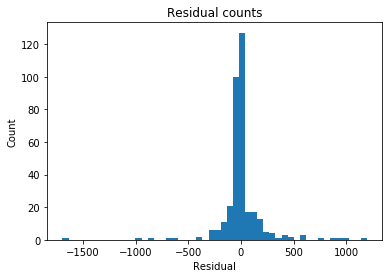

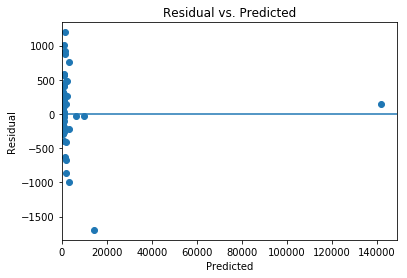

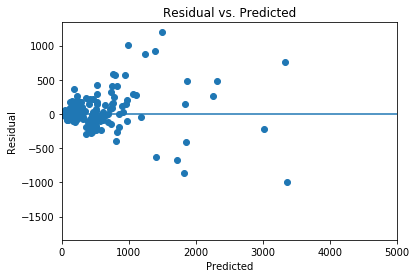

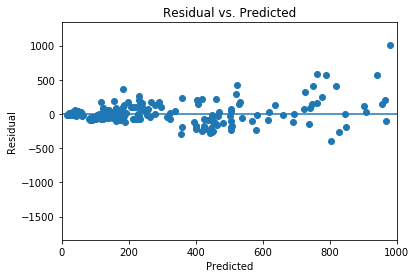

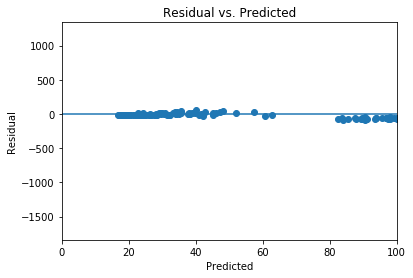

In [13]:
# Creation of the model
regr = linear_model.LinearRegression()

X = fbi_pca[['component_1','component_2','high_pop','low_pop']]
Y = fbi_pca['property_crime']

regr.fit(X,Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X)
actual = fbi_pca['property_crime']

# Calculate residuals
residual = actual - predicted
residual = pd.to_numeric(residual)

# Histograms of residuals
plt.hist(residual,bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim()
plt.show()

xlims = [(0,None),(0,5000),(0,1000),(0,100)]

for limit_tuple in xlims:
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.xlim(limit_tuple)
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()

This seems to solve the problem somewhat, but it might be a better idea to just include population as a variable somehow given that there's still a noticeable negative residual on the low end and positive residual on the high end of predictions. It seems that property crime seems to increase more exponentially than linearly. It may be beneficial to include the square root of population to help neutralize the impact of high population cities.

In [14]:
fbi_pca['sqrt_population'] = np.sqrt(fbi_pca['population'])

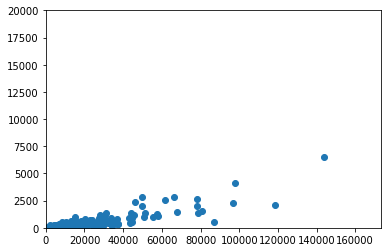

In [15]:
plt.scatter(fbi_pca['population'],fbi_pca['property_crime'])
plt.ylim(0,20000)
plt.xlim(0,np.percentile(fbi_pca['population'],99))
plt.show()


Coefficients: 
 [  2.46190922e+03  -1.04349224e+02   1.78708903e+00   2.03874245e+01
   4.14859782e+01]

Intercept: 
 575.653416529

R-squared:
0.9992794852


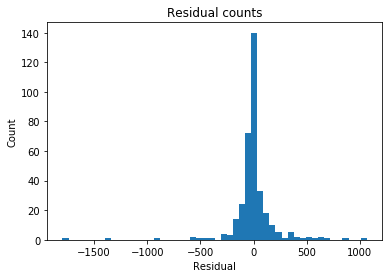

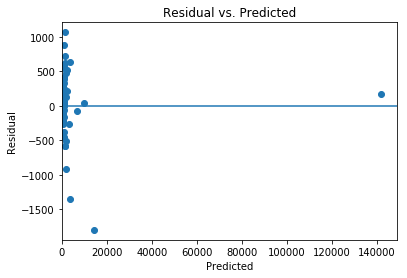

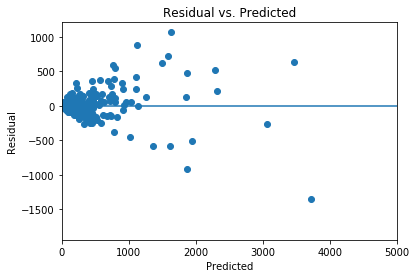

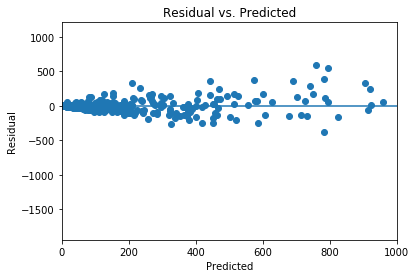

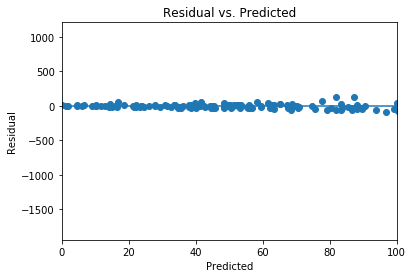

In [16]:
# Creation of the model
regr = linear_model.LinearRegression()

X = fbi_pca[['component_1','component_2','sqrt_population','low_pop','high_pop']]
Y = fbi_pca['property_crime']


regr.fit(X,Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X)
actual = fbi_pca['property_crime']

# Calculate residuals
residual = actual - predicted
residual = pd.to_numeric(residual)

# Histogram of residuals
plt.hist(residual,bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim()
plt.show()

#Scatters
xlims = [(0,None),(0,5000),(0,1000),(0,100)]

for limit_tuple in xlims:
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.xlim(limit_tuple)
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()

This is a pretty big improvement, and the cities on the lower end seem to be much better predicted. It may be worthwhile to consider different ways of incorporating the changes in the behavior of the data on the low and high ends. It may be beneficial to exclude these observations depending on the context of the research question (eg just wanting to estimate medium sized towns instead of the very large or very small).